# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head(5)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
powers_df.head(5)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
heroes_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
heroes_df.head(5)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [7]:
print(heroes_df.info())
print(powers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None


In [8]:
print (heroes_df.isna().sum())

print (powers_df.isna().sum())


name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64
hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
       

In [9]:
# heroes numerical columns: Height, Weight.
# 2 records have NaN for Weight
height_mean = heroes_df['Height'].mean()
height_median = heroes_df['Height'].median()
weight_mean = heroes_df['Weight'].mean()
weight_median = heroes_df['Weight'].median()


print("Height mean: " + str(height_mean))
print("Height median: " + str(height_median))
print("")
print("Weight mean: " + str(weight_mean))
print("Weight median: " + str(weight_median))

print("")

# heroes categorical columns
# 15 records have NaN for Publisher
print('Gender:')
print(heroes_df['Gender'].unique())
print('Eye color:')
print(heroes_df['Eye color'].unique())
print('Race:')
print(heroes_df['Race'].unique())
print('Hair color:')
print(heroes_df['Hair color'].unique())
print('Publisher')
print(heroes_df['Publisher'].unique())
print('Skin color:')
print(heroes_df['Skin color'].unique())
print('Alignment:')
print(heroes_df['Alignment'].unique())


Height mean: 102.25408719346049
Height median: 175.0

Weight mean: 43.8551912568306
Weight median: 62.0

Gender:
['Male' 'Female' '-']
Eye color:
['yellow' 'blue' 'green' 'brown' '-' 'red' 'violet' 'white' 'purple'
 'black' 'grey' 'silver' 'yellow / red' 'yellow (without irises)' 'gold'
 'blue / white' 'hazel' 'green / blue' 'white / red' 'indigo' 'amber'
 'yellow / blue' 'bown']
Race:
['Human' 'Icthyo Sapien' 'Ungaran' 'Human / Radiation' 'Cosmic Entity' '-'
 'Cyborg' 'Xenomorph XX121' 'Android' 'Vampire' 'Mutant' 'God / Eternal'
 'Symbiote' 'Atlantean' 'Alien' 'Neyaphem' 'New God' 'Alpha' 'Bizarro'
 'Inhuman' 'Metahuman' 'Demon' 'Human / Clone' 'Human-Kree'
 'Dathomirian Zabrak' 'Amazon' 'Human / Cosmic' 'Human / Altered'
 'Kryptonian' 'Kakarantharaian' 'Zen-Whoberian' 'Strontian' 'Kaiju'
 'Saiyan' 'Gorilla' 'Rodian' 'Flora Colossus' 'Human-Vuldarian'
 'Asgardian' 'Demi-God' 'Eternal' 'Gungan' 'Bolovaxian' 'Animal'
 'Czarnian' 'Martian' 'Spartoi' 'Planet' 'Luphomoid' 'Parademon' 'Yau

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

For the 15 records that had no Publisher, I made the Publisher value = 'Unknown'.
My reasoning is that this categorical value will not adversely impact any analysis I am likely to run and it is better to keep all 15 records and be able to segregate them out if needed.

For the 2 records that have NaN for Weight, I chose to change them both to the Median value.
Deleting the records would not improve analysis of the Weight data and if I deleted these records I would lose all the other data present in these two records.

I also found some records that had unusual values for weight, such as -99. I chose to change all values below zero to zero. 


In [10]:
# heroes_df.Publisher Nan's changed to 'Unknown' for 15 records

heroes_df['Publisher'].fillna(value='Unknown', inplace=True)

heroes_df['Publisher'].unique()


array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Unknown', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [11]:
# heroes_df.Weight, 2 records
# print("NaN's in heroes_df:")
# heroes_df[heroes_df.isnull().any(axis=1)]

heroes_df['Weight'].fillna(value=heroes_df['Weight'].median(), inplace=True)
# print("After change NaN's in heroes_df:")
# heroes_df[heroes_df.isnull().any(axis=1)]

# change -99 weight and height values to zero
heroes_df['Weight'].replace(-99,0, inplace=True)
heroes_df['Height'].replace(-99,0, inplace=True)


In [12]:
heroes_df['Weight'].describe()

count    734.000000
mean      75.870572
std      100.330210
min        0.000000
25%        0.000000
50%       62.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64

In [13]:
heroes_df['Height'].describe()

count    734.000000
mean     131.522480
std       98.701014
min        0.000000
25%        0.000000
50%      175.000000
75%      185.000000
max      975.000000
Name: Height, dtype: float64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [14]:
#set index of both dataframes as name
heroes_df.set_index('name', inplace=True)
powers_df.set_index('hero_names', inplace=True)

In [15]:
heroes_df.head(5)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0


In [16]:
powers_df.head(5)

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
hero_names,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# use left join so that I have all heroes, and for each hero their powers are added from the powers_df data frame

hp = heroes_df.join(powers_df, how='left')

# del heroes_powers

In [18]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, A-Bomb to Zoom
Columns: 176 entries, Gender to Omniscient
dtypes: float64(2), object(174)
memory usage: 1015.0+ KB


In [19]:
hp.head(10)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
Adam Monroe,Male,blue,-,Blond,0.0,NBC - Heroes,-,good,0.0,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# check for NaN's
print (hp.isna().sum())

Gender                    0
Eye color                 0
Race                      0
Hair color                0
Height                    0
Publisher                 0
Skin color                0
Alignment                 0
Weight                    0
Agility                  74
Accelerated Healing      74
Lantern Power Ring       74
Dimensional Awareness    74
Cold Resistance          74
Durability               74
Stealth                  74
Energy Absorption        74
Flight                   74
Danger Sense             74
Underwater breathing     74
Marksmanship             74
Weapons Master           74
Power Augmentation       74
Animal Attributes        74
Longevity                74
Intelligence             74
Super Strength           74
Cryokinesis              74
Telepathy                74
Energy Armor             74
                         ..
Intuitive aptitude       74
Vision - Microscopic     74
Melting                  74
Wind Control             74
Super Breath        

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

There is 734 records in the heroes_df, yet only 667 entries in the powers_df. This indicates that 67 heroes do not have any powers listed in the powers_df dataframe. 

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [21]:
males = hp[hp['Gender'] == 'Male']
females = hp[hp['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    x = dataframe.loc[:,column_name]
    sns.distplot(x, axlabel=gender)


# seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, 
#                  hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, 
#                  color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

# sns.distplot(males.Height)

In [22]:
males.head(5)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# Male Height
print('males height:')
males.Height.describe()

males height:


count    505.000000
mean     136.093069
std      104.764932
min        0.000000
25%        0.000000
50%      180.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64

males height distplot:


/Users/giovanni/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


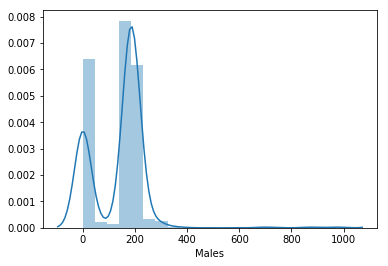

In [24]:
print('males height distplot:')
show_distplot(males,'Males','Height')

In [25]:
print('males weight:')
males.Weight.describe()

males weight:


count    505.000000
mean      84.417822
std      108.211038
min        0.000000
25%        0.000000
50%       79.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64

males weight distplot:


/Users/giovanni/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


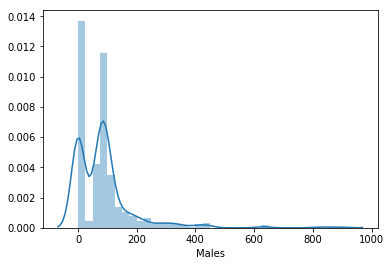

In [26]:
# Male Weight
print('males weight distplot:')
show_distplot(males,'Males','Weight')

In [27]:
# Female Height
print('females height:')
females.Height.describe()

females height:


count    200.000000
mean     125.772500
std       81.155348
min        0.000000
25%        0.000000
50%      168.000000
75%      175.000000
max      366.000000
Name: Height, dtype: float64

females height distplot:


/Users/giovanni/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


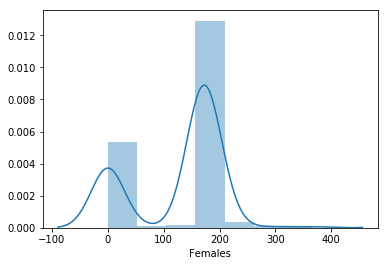

In [28]:
print('females height distplot:')
show_distplot(females,'Females','Height')

In [29]:
# Female Weight
print('females weight:')
females.Weight.describe()


females weight:


count    200.000000
mean      55.975000
std       74.057457
min        0.000000
25%        0.000000
50%       54.000000
75%       61.000000
max      630.000000
Name: Weight, dtype: float64

females weight distplot:


/Users/giovanni/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


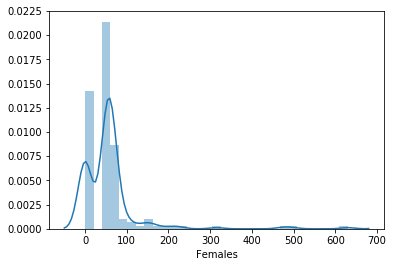

In [30]:
print('females weight distplot:')
show_distplot(females,'Females','Weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________
Both females and males had a signifagant proportion of heroes that had "no" weight and/or no height. 
Disregarding those "massless" hereoes, I observe the following regarding the height and weight data:

* The males have greater values for maximum Height and Weight
  * Male height max: 975
  * Female height max: 366
  * Male weight max: 900
  * Female weight max 630
* Mean and median:
 * Male height mean is 136 and the median is 180. 
 * Female height mean is 126 and the median is 168.
 * The many "zero" height heroes are dragging the mean downward for both groups.
 * Male weight mean is 84 and the median is 79.
 * Female weight mean is 56 and the median is 54.
 * It looks like the zero value weight heroes are having a more signifigant impact on the males mean than the mean for the females.
 
* If the zero value height and/or weight heroes were excluded from these graphs, I notice that the distribution of the height data is roughly symetrical, with the males showing a slight positive skew. The distribution of the weight data has a slight postitive skew in both males and females.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
  * Super Strength           362
  * Stamina                  294
  * Durability               262
  * Super Speed              251
  * Agility                  244
* What are the 5 most common powers in the Marvel Universe?
  * Super Strength                  204
  * Durability                      154
  * Stamina                         150
  * Super Speed                     137
  * Agility                         126

* What are the 5 most common powers in the DC Universe?
  * Super Strength           109
  * Stamina                   90
  * Flight                    86
  * Super Speed               79
  * Agility                   71




In [72]:
hp[hp == 1].count().sort_values(ascending=False)

Super Strength           362
Stamina                  294
Durability               262
Super Speed              251
Agility                  244
Flight                   212
Accelerated Healing      181
Reflexes                 173
Intelligence             158
Energy Blasts            148
Stealth                  132
Marksmanship             124
Invulnerability          116
Longevity                116
Weapons Master           107
Telepathy                 92
Enhanced Senses           91
Force Fields              86
Energy Absorption         77
Enhanced Hearing          72
Teleportation             70
Immortality               69
Jump                      66
Shapeshifting             65
Weapon-based Powers       62
Telekinesis               61
Natural Weapons           60
Size Changing             55
Energy Manipulation       53
Psionic Powers            51
                        ... 
Odin Force                 2
Illumination               2
Qwardian Power Ring        2
Vitakinesis   

In [73]:
marvel = hp[hp.Publisher == 'Marvel Comics']
marvel.head(5)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,False,...,False,False,False,False,False,False,False,False,False,False
Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
marvel[marvel == 1].count().sort_values(ascending=False)

Super Strength                  204
Durability                      154
Stamina                         150
Super Speed                     137
Agility                         126
Flight                          111
Accelerated Healing             100
Reflexes                         97
Energy Blasts                    87
Longevity                        60
Intelligence                     59
Telepathy                        57
Invulnerability                  53
Stealth                          47
Marksmanship                     47
Enhanced Senses                  45
Force Fields                     43
Energy Absorption                43
Natural Weapons                  39
Teleportation                    39
Psionic Powers                   38
Telekinesis                      36
Weapons Master                   36
Shapeshifting                    34
Immortality                      34
Weapon-based Powers              34
Toxin and Disease Resistance     32
Size Changing               

In [75]:
dc = hp[hp.Publisher == 'DC Comics']
dc.head(5)

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,False,...,False,False,False,False,False,False,False,False,False,False
Alan Scott,Male,blue,-,Blond,180.0,DC Comics,-,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Alfred Pennyworth,Male,blue,Human,Black,178.0,DC Comics,-,good,72.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amazo,Male,red,Android,-,257.0,DC Comics,-,bad,173.0,True,...,False,False,False,False,False,False,False,False,False,False


In [76]:
dc[dc == 1].count().sort_values(ascending=False)

Super Strength           109
Stamina                   90
Flight                    86
Super Speed               79
Agility                   71
Durability                71
Intelligence              67
Accelerated Healing       51
Reflexes                  49
Stealth                   48
Invulnerability           45
Marksmanship              44
Energy Blasts             43
Weapons Master            40
Longevity                 33
Force Fields              32
Energy Absorption         30
Enhanced Hearing          29
Energy Constructs         27
Enhanced Senses           27
Size Changing             21
Self-Sustenance           21
Weapon-based Powers       20
Phasing                   19
Telepathy                 19
Shapeshifting             19
Vision - X-Ray            19
Teleportation             19
Immortality               19
Vision - Telescopic       18
                        ... 
Omniscient                 0
Hyperkinesis               0
Power Cosmic               0
Phoenix Force 

In [83]:
# original solution
# powers2 = powers_df.apply(pd.Series.value_counts)
# powers2
# powers2 = powers_df[powers_df ==1].count()
# powers2 = powers2.sort_values(ascending=False)



Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________

The top 5 powers in the Marvel and DC universes are very similar. The only difference is that in the Marvel universe "Durability" is the second most common power, but is not in the top 5 of the DC universe. In the DC universe "Flight" is the third most common power but it did not make the top 5 in the Marvel universe.



### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [82]:
# Super Strength                  204
# Durability                      154
# Stamina                         150
# Super Speed                     137
# Agility                         126
# Flight                          111
# Accelerated Healing             100
# Reflexes                         97
# Energy Blasts                    87
# Longevity                        60
# Intelligence                     59
# Telepathy                        57
# Invulnerability                  53


In [88]:
# add a column to indicate how many powers each hero has
# create a list of powers_df keys
col_list = list(powers_df)
# print(col_list)

hp['powers_count'] = hp[col_list].sum(axis=1)

In [107]:
len(hp.Publisher.unique())

25

In [130]:
# hp.powers_count.sort_values(ascending=False)

# groupby('Publisher')

powers = hp.groupby('Publisher')['Publisher','powers_count'].mean()
print(powers)

                   powers_count
Publisher                      
ABC Studios            1.750000
DC Comics              9.004651
Dark Horse Comics     13.388889
George Lucas          10.214286
Hanna-Barbera         10.000000
HarperCollins          1.166667
IDW Publishing         9.750000
Icon Comics            3.250000
Image Comics           7.071429
J. K. Rowling         18.000000
J. R. R. Tolkien      20.000000
Marvel Comics          7.907216
Microsoft             11.000000
NBC - Heroes           1.631579
Rebellion             10.000000
Shueisha              19.750000
Sony Pictures          5.500000
South Park             3.000000
Star Trek              8.166667
SyFy                   3.200000
Team Epic TV           5.800000
Titan Books            7.000000
Universal Studios      3.000000
Unknown                5.533333
Wildstorm             11.000000


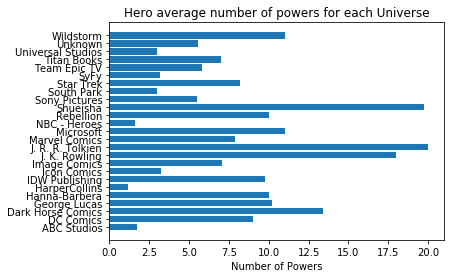

In [138]:
# figure1 = plt.figure(figsize=(10,6))
# ax = figure1.add_subplot(121)

y_pos = np.arange(len(powers))
                  
plt.barh(y_pos, powers.powers_count)
plt.yticks(y_pos, powers.index)
plt.xlabel('Number of Powers')                
plt.title('Hero average number of powers for each Universe')
                  
plt.show()                

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data